# Exploración del módulo log_analyzer de pylinac

A continuación se presenta un análisis exhaustivo del módulo de ```log_analyzer``` de la librería ```Pylinac``` versión 2.4.0.1, basada en la documentación mostrada en linea: https://pylinac.readthedocs.io/en/stable/log_analyzer.html

Esta exploración muestra todos los comandos disponibles que pueden ejecutarse una vez que se ha cargado correctamente un archivo *Trajectory Log File* o TLF. El archivo TLF utilizado en este documento proviene del mismo módulo ```log_analyzer```, es decir, es un archivo demostrativo o "demo", sin embargo, los comandos mostrados aquí también son aplicables a otros archivos TLF similares. Los pasos para cargar en memoria dicho archivo se mostrarán más adelante. 

Esta guía está separada en 2 subtemas que están relacionados con la estructura propia de los archivos TLF diseñados por Varian. Los subtemas son: ```Header```, ```Axis Data```. De igual manera, estos se tratarán en mayor detalle más adelante.

## 1. Introducción

Antes de trabajar con un archivo TLF se debe importar el módulo ```log_analyzer``` de la librería ```Pylinac``` de la siguiente manera:

In [1]:
from pylinac import log_analyzer as logan

Se importarán también otras librerías que permiten trabajar con fórmulas matemáticas y matrices, así como para gráficar:

In [2]:
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt

Si no se dispone de un archivo TLF, el módulo trae consigo un archivo TLF que puede ser cargado en memoria (instanciado) y analizarlo con algunas especificaciones ya predeterminadas. Para hacerlo se ejecuta el siguiente código:

Results of file: C:\Users\Angel\anaconda3\envs\pycaret\lib\site-packages\pylinac\demo_files\Tlog.bin
Average RMS of all leaves: 0.010 mm
Max RMS error of all leaves: 0.022 mm
95th percentile error: 0.025 mm
Number of beam holdoffs: 19
Gamma pass %: 100.00
Gamma average: 0.002



<IPython.core.display.Javascript object>


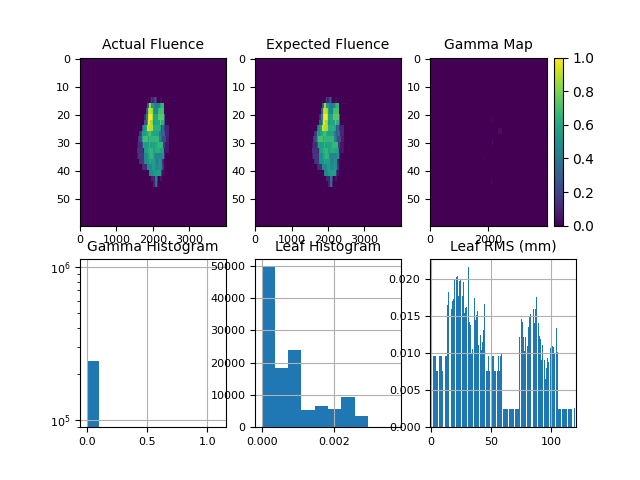

In [3]:
logan.TrajectoryLog.run_demo()

Vemos que la anterior imagen contiene los dos mapas de fluencia generados por las posiciones actuales (reportadas por el controlador del MLC) y las esperadas (generadas por el TPS). También se muestra un mapa de índice gamma evaluado con los criterios predeterminados (1 mm, 1%). Como es de esperarse, el mapa gamma muestra que la mayoría de los valores son cercanos a 0, por lo que el 100% de los puntos evaluados pasan la prueba.

En la parte inferior de la figura se muestran tres histogramas, uno que representa la distribución de valores de los indices gamma (todos cercanos a 0), otro que representa la distribución de los errores de posición **absolutos** de las hojas del MLC y el tercero que muestra los valores **RMS** (Root Mean Square) o de la desviación cuadrática media asociada a cada hoja del MLC (120 hojas en total).

A continuación cargaremos en memoria el archivo TLF demostrativo de la librería ```log_analyzer``` y ejecutaremos algunos comandos básicos: 

In [9]:
tlf_demo = logan.TrajectoryLog.from_demo()

In [10]:
# Indica si el archivo TLF incluye datos cuando el haz de radiación estaba apagado.
tlf_demo.exclude_beam_off

True

In [11]:
# Indica el nombre y lugar donde se guarda el archivo TLF demo.
tlf_demo.filename

'C:\\Users\\Angel\\anaconda3\\envs\\pycaret\\lib\\site-packages\\pylinac\\demo_files\\Tlog.bin'

In [12]:
# Indica si el acelerador tiene un MLC del tipo HD o no.
tlf_demo.is_hdmlc

True

In [13]:
# Regresa el número de veces que el haz de radiación fue apagado.
tlf_demo.num_beamholds

19

Podemos extraer las gráficas mostradas en la anterior figura demostrativa mediante los siguientes comandos:

<IPython.core.display.Javascript object>


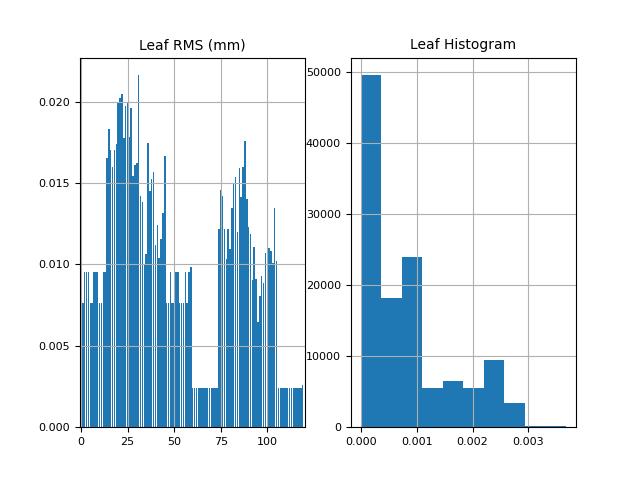

In [14]:
# graph: {'gamma hist', 'leaf hist', 'leaf rms'} # gamma hist no puede mostrarse a menos que
#ya se haya calculado el mapa gamma con .calc_map
plt.figure()
tlf_demo.plot_subgraph(graph="leaf rms", ax=plt.subplot(121), show=False)
tlf_demo.plot_subgraph(graph="leaf hist",ax=plt.subplot(122), show=False)
# Nota: Es mejor generar estas mismas gráficas de histogramas, pero con mejor diseño

Algunos parámetros que lanzan un error porque aún no se ha calculado el mapa gamma:

In [15]:
# plot_subimage: Grafica imagenes de la fluencia actual, esperada o mapa gamma
# parametros: img: {'actual', 'expected', 'gamma'} y los mismos que la celda anterior
# Demostración: (actualmente lanzará un error puesto que no sea han calculado los mapas de fluencia)
#plt.figure()
#tlf_demo.plot_subimage(img="actual")

In [16]:
#tlf_demo.plot_summary() # Tambien genera error pues aún no se generan los mapas de fluencia

In [17]:
#tlf_demo.publish_pdf() # Publish (print) a PDF containing the analysis and quantitative results.

In [18]:
tlf_demo.report_basic_parameters(); # No sé por qué aquí sí calcula los mapas gamma pero en las imágenes no :/
# Supongo que los calcula "al vuelo"

Results of file: C:\Users\Angel\anaconda3\envs\pycaret\lib\site-packages\pylinac\demo_files\Tlog.bin
Average RMS of all leaves: 0.010 mm
Max RMS error of all leaves: 0.022 mm
95th percentile error: 0.025 mm
Number of beam holdoffs: 19
Gamma pass %: 100.00
Gamma average: 0.002



Print the common parameters analyzed when investigating machine logs:

- Log type
- Average MLC RMS
- Maximum MLC RMS
- 95th percentile MLC error
- Number of beam holdoffs
- Gamma pass percentage
- Average gamma value

In [19]:
tlf_demo.treatment_type #The treatment type of the log. Possible options: "VMAT", "Dynamic IMRT", "Static IMRT" o "Imaging"

'Dynamic IMRT'

## HEADER (Puede variar el número de atributos dependiendo de la versión)

Header information is essentially anything that isn’t axis measurement data; it’s metadata about the file, format, machine configuration, etc. 

In [20]:
tlf_demo.header.header # firma

'VOSTL'

In [21]:
tlf_demo.header.version # versión

2.1

In [22]:
tlf_demo.header.header_size # tamaño (en bytes)

1024

In [23]:
tlf_demo.header.sampling_interval # en milisegundos

20

In [24]:
tlf_demo.header.num_axes # número de "axes" o longitud del "Axis data" (siguiente sección al header)

14

Number of axes sampled.
Indicates the length of the next field, Axis enumeration.

In [25]:
tlf_demo.header.axis_enum # see below:

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 40, 41, 42, 50])

Axis enumeration (The MLC is enumerated as a single axis, if included, all leaves are included.)
Coll Rtn – 0 Gantry Rtn – 1 Y1 – 2 Y2 – 3 X1 – 4 X2 – 5 Couch Vrt – 6 Couch Lng – 7 Couch Lat – 8 Couch Rtn – 9 Couch Pit – 10 Couch Rol - 11 MU – 40 Beam Hold – 41 Control Point - 42 MLC – 50 TargetPosition – 60 (T) TrackingTarget – 61 (T) TrackingBase – 62 (T) TrackingPhase – 63 (T) TrackingConformityIndex – 64 (T)

In [26]:
tlf_demo.header.samples_per_axis # This is one for most axes. For the MLC, it is the number of leaves and carriages.

array([  1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
       122])

In [27]:
tlf_demo.header.axis_scale # 1- Machine Scale, 2- Modified IEC 61217

1

In [28]:
tlf_demo.header.num_subbeams # Number of subbeams

2

In [29]:
tlf_demo.header.is_truncated # see below:

0

The system is configured to record 60000 snapshots (20 minutes with a 20ms sampling interval). If the plan exceeds 20 minutes, the system stops recording data to the trajectory log and sets this flag to true (1). Otherwise the flag is false (0).

In [30]:
tlf_demo.header.num_snapshots # Number of snapshots

5200

In [31]:
tlf_demo.header.mlc_model # MLC model: 0 = NDS 80, 2 = NDS 120, 3 = NDS 120 HD

3

In [32]:
tlf_demo.header.num_mlc_leaves # Number of MLC leaves.

120

In [33]:
tlf_demo.header.num_snapshots # Number of snapshots, cycles, heartbeats, or whatever you’d prefer to call them.

5200

## Axis Data 

Axis data is all the information relating to the measurements of the various machine axes and is accessible under the axis_data attribute. This includes the gantry, collimator, MLCs, etc. Trajectory logs capture more information than Dynalogs, and additionally hold the expected positions not only for MLCs but also for all axes. Every measurement axis has Axis as its base; they all have similar methods to access and plot the data (see Plotting & Saving Axes/Fluences). However, not all attributes are axes. Pylinac adds properties to the axis data structure for ease of use (e.g. the number of snapshots) For Trajectory logs the following attributes are available, based on the TrajectoryLogAxisData class:

### Collimator:

In [34]:
tlf_demo.axis_data.collimator.actual # array de las posiciones angulares actuales (en grados) del colimador

array([179.99992371, 179.99992371, 179.99992371, ..., 179.99992371,
       179.99992371, 179.99992371])

In [35]:
tlf_demo.axis_data.collimator.expected.shape # array de las posiciones angulares esperadas (en grados) del colimador

(5200,)

In [36]:
tlf_demo.axis_data.collimator.difference # array de las diferencias entre las dos anteriores

array([-7.62939453e-05, -7.62939453e-05, -7.62939453e-05, ...,
       -7.62939453e-05, -7.62939453e-05, -7.62939453e-05])

In [37]:
tlf_demo.axis_data.collimator.moved # Se movió el colimador durante el tratamiento?

False

<IPython.core.display.Javascript object>


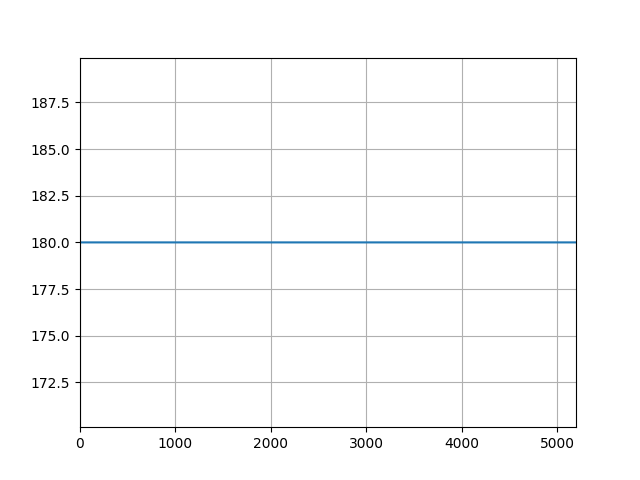

In [38]:
# Gráficas de las posiciones de las hojas con los métodos de graficacion incorporados:
plt.figure()
tlf_demo.axis_data.collimator.plot_expected()

### beam hold
Beam hold state; 0 -> holdoff not asserted (beam on), 1 -> holdoff asserted, 2 -> carriage in transition.

Beam hold state. Beam pauses (e.g. Beam Off button pressed) are not recorded in the log. Data is automatic hold state. 0 -> Normal; beam on. 1 -> Freeze; beam on, dose servo is temporarily turned off. 2 -> Hold; servo holding beam. 3 -> Disabled; beam on, dose servo is disable via Service.

Attributes:
'actual',
 'expected',
 'difference',
 'plot_actual',
 'save_plot_actual',
 'plot_expected',
 'save_plot_expected',
 'plot_difference',
 'save_plot_difference'

The beam may be paused as a result of a minor fault being raised during treatment. The user can also pause the beam by pressing the Beam Off button. In this case, the system does not keep any beam records during the beam pause. When the beam is resumed, the trajectory log starts recording again.

Consequently, there are no trajectory log records during such a pause.

The trajectory log does not directly display such a beam pause. The trajectory log shows an axis ramp down and subsequent axis ramp up around the point where the beam is paused.

#### Dose Servo States

If the beam is held, for example, as a result of gating, the system continues to keep beam records. The trajectory log indicates a dose servo hold asserted for the duration of the beam hold. The dose servo disabled state is possible only when the Service application is running. The service technician can disable the dose servo through the Service application. The dose servo is always enabled when the Treatment application is running. When the dose servo is disabled, the MV beam can still be delivered, but the dose output is not adjusted to achieve planned beam delivery. The dose servo field is an enumeration:

Dose Servo States
State
Value
Explanation

NORMAL
0
MV beam is being delivered, and dose servo is enabled.

FREEZE
1
MV beam is being delivered, but dose servo is temporarily turned off, so the dose rate is kept constant. Only occurs during

HOLD
2
MV beam is not being delivered, because dose servo is holding the MV beam. Occurs during gating, field-to-field transitions, some control point transitions, or beam pause.

DISABLED
3
MV beam is being delivered, but the dose servo is disabled by the user through the Service application. The dose is always enabled while the treatment application is running.

In [39]:
tlf_demo.axis_data.beam_hold.__doc__

'Axis holding beam information (e.g. MU, beam hold status).'

In [40]:
tlf_demo.axis_data.beam_hold.actual, len(tlf_demo.axis_data.beam_hold.actual)

(array([2., 2., 2., ..., 2., 2., 2.]), 5200)

In [41]:
set(tlf_demo.axis_data.beam_hold.expected) # valores únicos

{0.0, 2.0}

In [42]:
set(tlf_demo.axis_data.beam_hold.actual) # valores únicos

{0.0, 2.0}

In [43]:
set(tlf_demo.axis_data.beam_hold.difference) # jeje esto no tiene sentido xD

{-2.0, 0.0, 2.0}

<IPython.core.display.Javascript object>


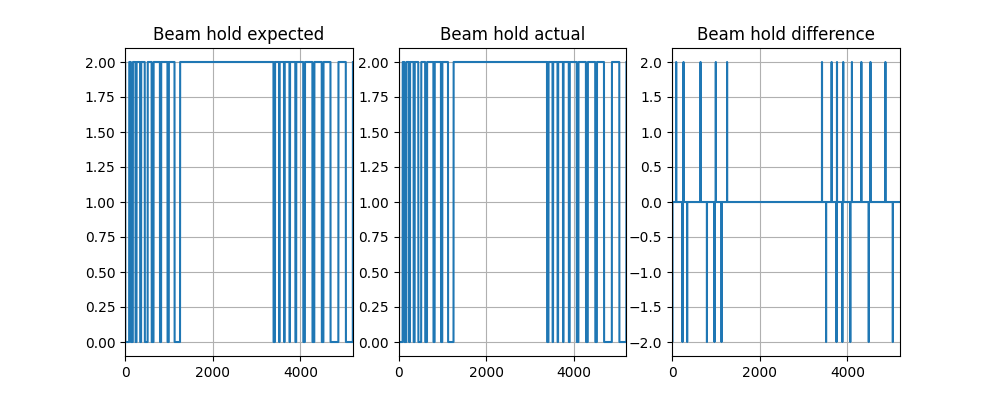

In [44]:
plt.figure(figsize=(10,4))
plt.subplot(131)
tlf_demo.axis_data.beam_hold.plot_expected()
plt.title("Beam hold expected")
plt.subplot(132)
tlf_demo.axis_data.beam_hold.plot_actual()
plt.title("Beam hold actual")
plt.subplot(133)
tlf_demo.axis_data.beam_hold.plot_difference()
plt.title("Beam hold difference");

### carriage_A and carriage_B
Carriage A (or B) data. Data in cm. Atributos:'actual', 'expected', 'difference', 'plot_actual', "save_plot_actual", 'plot_expected', 'save_plot_expected', 'plot_difference', 'save_plot_difference', 'AXIS_MOVE_THRESHOLD', 'moved'. 

In [45]:
tlf_demo.axis_data.carriage_A.__doc__

'Axis holding head information (e.g. jaw positions, collimator).'

In [46]:
tlf_demo.axis_data.carriage_A.__dict__

{'actual': array([5.65301132, 5.65301132, 5.65301132, ..., 5.94564295, 5.94564295,
        5.94564295]),
 'expected': array([5.65321255, 5.65321255, 5.65321255, ..., 5.94558764, 5.94558764,
        5.94558764])}

In [47]:
tlf_demo.axis_data.carriage_A.moved, tlf_demo.axis_data.carriage_B.moved

(True, True)

<IPython.core.display.Javascript object>


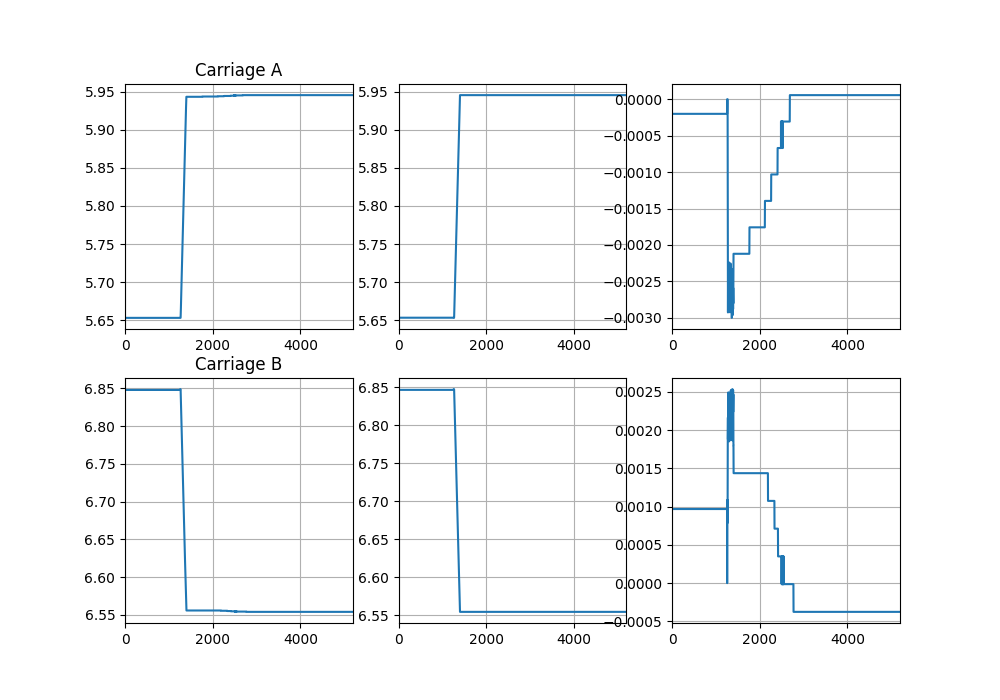

In [49]:
plt.figure(figsize=(10,7))
plt.subplot(231)
plt.title("Carriage A")
tlf_demo.axis_data.carriage_A.plot_actual()
plt.subplot(232)
tlf_demo.axis_data.carriage_A.plot_expected()
plt.subplot(233)
tlf_demo.axis_data.carriage_A.plot_difference()
plt.subplot(234)
plt.title("Carriage B")
tlf_demo.axis_data.carriage_B.plot_actual()
plt.subplot(235)
tlf_demo.axis_data.carriage_B.plot_expected()
plt.subplot(236)
tlf_demo.axis_data.carriage_B.plot_difference()

### Control point
Current control point.

The control point is a float. The fractional part of the control point indicates percentage of the segment that is complete at that sample. For example, a control point value of 1.5 indicates the treatment is halfway between control point 1 and control point 2. Successive control points may be identical during beam holds. Note that there is no concept of separate expected and actual values for the control point. The control point is duplicated in the expected and actual fields to maintain consistency.

Attributes:
'actual',
 'expected',
 'difference',
 'plot_actual',
 'save_plot_actual',
 'plot_expected',
 'save_plot_expected',
 'plot_difference',
 'save_plot_difference'

In [50]:
tlf_demo.axis_data.control_point.__doc__

'Axis holding beam information (e.g. MU, beam hold status).'

In [51]:
tlf_demo.axis_data.control_point.__dict__

{'actual': array([ 0.,  0.,  0., ..., 37., 37., 37.]),
 'expected': array([ 0.,  0.,  0., ..., 37., 37., 37.])}

<IPython.core.display.Javascript object>


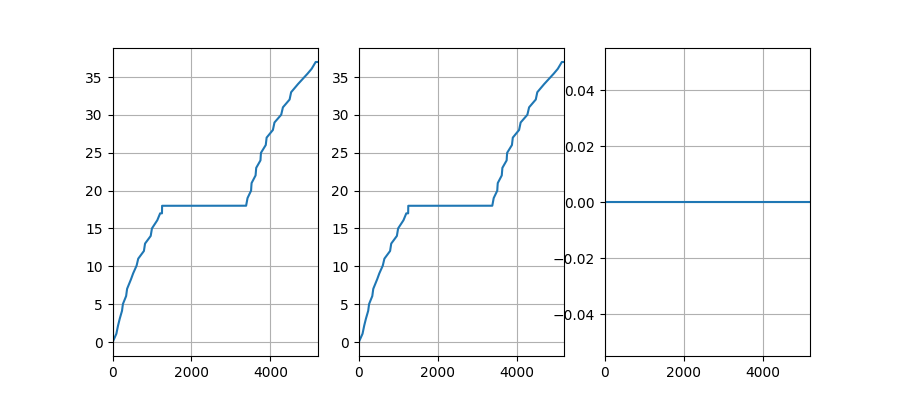

In [52]:
plt.figure(figsize=(9,4))
plt.subplot(131)
tlf_demo.axis_data.control_point.plot_actual()
plt.subplot(132)
tlf_demo.axis_data.control_point.plot_expected()
plt.subplot(133)
tlf_demo.axis_data.control_point.plot_difference()

### Data couch

The couch attribute is a data structure to hold lateral, longitudinal, etc couch positions. Each of these structures contains the attributes: 'actual',
 'expected', 'difference',
 'plot_actual',
 'save_plot_actual',
 'plot_expected',
 'save_plot_expected',
 'plot_difference',
 'save_plot_difference', 'AXIS_MOVE_THRESHOLD',
 'moved'

In [53]:
tlf_demo.axis_data.couch.__dict__

{'vert': <pylinac.log_analyzer.CouchAxis at 0x205c335aaf0>,
 'long': <pylinac.log_analyzer.CouchAxis at 0x205c335a9a0>,
 'latl': <pylinac.log_analyzer.CouchAxis at 0x205c335a3d0>,
 'rotn': <pylinac.log_analyzer.CouchAxis at 0x205c335aeb0>}

### Gantry
Gantry data in degrees.

The attributes are: 'actual', 'expected', 'difference', 'plot_actual', 'save_plot_actual', 'plot_expected', 'save_plot_expected', 'plot_difference', 'save_plot_difference', 'AXIS_MOVE_THRESHOLD', 'moved'

In [54]:
tlf_demo.axis_data.gantry.__dict__

{'actual': array([310.01623535, 310.01623535, 310.01623535, ...,  59.99778748,
         59.99778748,  59.99778748]),
 'expected': array([310.        , 310.01623535, 310.01623535, ...,  60.        ,
         60.        ,  60.        ])}

<IPython.core.display.Javascript object>


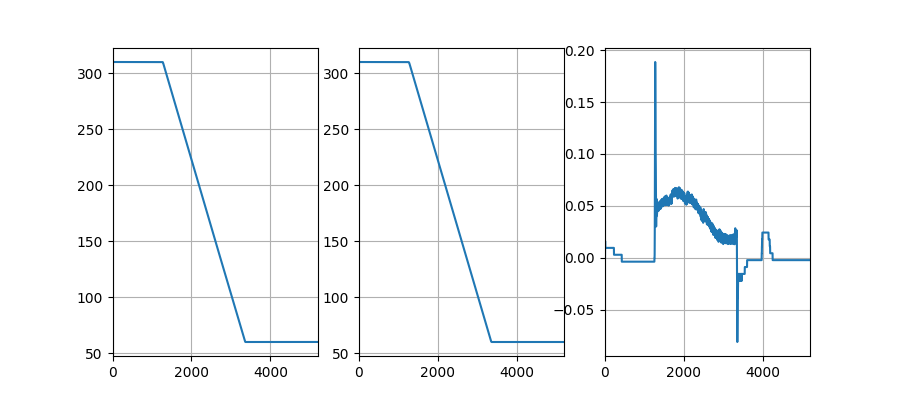

In [55]:
plt.figure(figsize=(9,4))
plt.subplot(131)
tlf_demo.axis_data.gantry.plot_actual()
plt.subplot(132)
tlf_demo.axis_data.gantry.plot_expected()
plt.subplot(133)
tlf_demo.axis_data.gantry.plot_difference()

### Jaws

Jaw data structure. Data in cm.

The attributes are: 'actual', 'expected', 'difference', 'plot_actual', 'save_plot_actual', 'plot_expected', 'save_plot_expected', 'plot_difference', 'save_plot_difference', 'AXIS_MOVE_THRESHOLD', 'moved'

In [56]:
tlf_demo.axis_data.jaws.__dict__

{'x1': <pylinac.log_analyzer.HeadAxis at 0x205c3402880>,
 'y1': <pylinac.log_analyzer.HeadAxis at 0x205c3389dc0>,
 'x2': <pylinac.log_analyzer.HeadAxis at 0x205c335ab50>,
 'y2': <pylinac.log_analyzer.HeadAxis at 0x205c3402ca0>}

In [57]:
tlf_demo.axis_data.jaws.x1.__dict__ # and so on for the others

{'actual': array([3.70000029, 3.69999909, 3.70000029, ..., 4.60000134, 4.60000038,
        4.60000038]),
 'expected': array([3.70000005, 3.70000005, 3.70000005, ..., 4.5999999 , 4.5999999 ,
        4.5999999 ])}

In [58]:
for jaw, graph in zip(["x1","y1","x2","y2"],["plot_actual()","plot_expected()", "plot_difference()"]*4):
    print (jaw, graph)

x1 plot_actual()
y1 plot_expected()
x2 plot_difference()
y2 plot_actual()


<IPython.core.display.Javascript object>


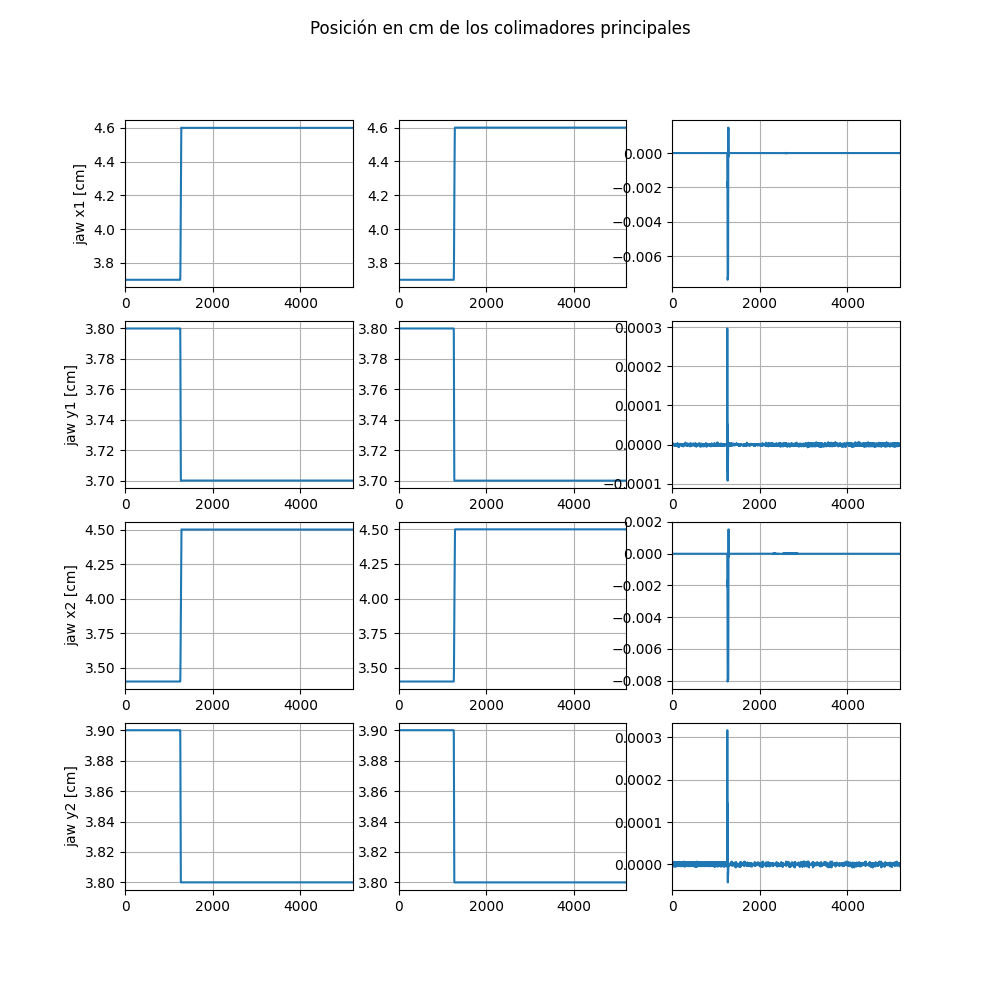

In [59]:
# Esto claramente debo automatizarlo:
plt.figure(figsize=(10,10))
plt.suptitle("Posición en cm de los colimadores principales")
plt.subplot(431)
plt.ylabel("jaw x1 [cm]")
tlf_demo.axis_data.jaws.x1.plot_actual()
plt.subplot(432)
tlf_demo.axis_data.jaws.x1.plot_expected()
plt.subplot(433)
tlf_demo.axis_data.jaws.x1.plot_difference()
#
plt.subplot(434)
plt.ylabel("jaw y1 [cm]")
tlf_demo.axis_data.jaws.y1.plot_actual()
plt.subplot(435)
tlf_demo.axis_data.jaws.y1.plot_expected()
plt.subplot(436)
tlf_demo.axis_data.jaws.y1.plot_difference()
#
plt.subplot(437)
plt.ylabel("jaw x2 [cm]")
tlf_demo.axis_data.jaws.x2.plot_actual()
plt.subplot(438)
tlf_demo.axis_data.jaws.x2.plot_expected()
plt.subplot(439)
tlf_demo.axis_data.jaws.x2.plot_difference()
#
plt.subplot(4,3,10)
plt.ylabel("jaw y2 [cm]")
tlf_demo.axis_data.jaws.y2.plot_actual()
plt.subplot(4,3,11)
tlf_demo.axis_data.jaws.y2.plot_expected()
plt.subplot(4,3,12)
tlf_demo.axis_data.jaws.y2.plot_difference()

### MLC

MLC data structure. Data in cm. 

The MLC class holds MLC information and retrieves relevant data about the MLCs and positions.

**important:**

Parameters:	
snapshot_idx (array, list) – The snapshots to be considered for RMS and error calculations (can be all snapshots or **just when beam was on**).

jaw_struct (Jaw_Struct) –

hdmlc (boolean) – If False (default), indicates a regular MLC model (e.g. Millennium 120). If True, indicates an HD MLC model (e.g. Millennium 120 HD).

Contains the following attributes:

'leaf_axes',
 'snapshot_idx',
 '_jaws',
 'hdmlc',
 'log_type',
 'subbeams',
 'from_dlog',
 'from_tlog',
 'num_pairs',
 'num_leaves',
 'num_snapshots',
 'num_moving_leaves',
 'moving_leaves',
 'add_leaf_axis',
 'leaf_moved',
 'pair_moved',
 '_all_leaf_indices',
 'get_RMS_avg',
 'get_RMS_max',
 'get_RMS_percentile',
 'get_RMS',
 'get_leaves',
 'get_error_percentile',
 'create_error_array',
 'create_RMS_array',
 '_abs_error_all_leaves',
 '_error_array_all_leaves',
 '_snapshot_array',
 '_RMS_array_all_leaves',
 'leaf_under_y_jaw',
 'get_snapshot_values',
 'plot_mlc_error_hist',
 'save_mlc_error_hist',
 'plot_rms_by_leaf',
 'save_rms_by_leaf'.

#### Leaf axes

The dictionary is keyed by the leaf number, with the Axis as the value. Remember use the .items() method for for loops xD

In [55]:
tlf_demo.axis_data.mlc.leaf_axes.keys() # Regresa una lista con las keys del diccionario

dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120])

In [56]:
tlf_demo.axis_data.mlc.leaf_axes.get(1).actual

array([-4.20030403, -4.20030403, -4.20030403, ..., -5.0997839 ,
       -5.0997839 , -5.0997839 ])

In [57]:
tlf_demo.axis_data.mlc.leaf_axes[1].actual # tiene los atributos de la clase Axis

array([-4.20030403, -4.20030403, -4.20030403, ..., -5.0997839 ,
       -5.0997839 , -5.0997839 ])

In [58]:
tlf_demo.axis_data.mlc.leaf_axes[1].difference.shape # Dimensión del array (toma en cuenta todos los snapshots, No coveniente)

(5200,)

In [59]:
# Example of iteration:
for key, dictionary in tlf_demo.axis_data.mlc.leaf_axes.items():
    print (key, dictionary.actual)
    if key == 5:
        break

1 [-4.20030403 -4.20030403 -4.20030403 ... -5.0997839  -5.0997839
 -5.0997839 ]
2 [-4.20030403 -4.20030403 -4.20030403 ... -5.10017395 -5.10017395
 -5.10017395]
3 [-4.20030403 -4.20030403 -4.20030403 ... -5.10017395 -5.10017395
 -5.10017395]
4 [-4.20030403 -4.20030403 -4.20030403 ... -5.10017395 -5.10017395
 -5.10017395]
5 [-4.20030403 -4.20030403 -4.20030403 ... -5.10017395 -5.10017395
 -5.10017395]


In [60]:
#tlf_demo.axis_data.mlc.from_dlog # Construct an MLC structure from a Dynalog
#tlf_demo.axis_data.mlc.from_tlog # Construct an MLC instance from a Trajectory log.

In [61]:
tlf_demo.axis_data.mlc.num_pairs # Return the number of MLC pairs.

60

In [62]:
tlf_demo.axis_data.mlc.num_leaves # Return the number of MLC leaves.

120

In [63]:
tlf_demo.axis_data.mlc.num_snapshots # Return the number of snapshots used for MLC RMS & Fluence calculations.

1021

Observa que el número es menor al número total de snapshots que muestra el header. TODO: Saber si ese numero es menor debido a que sólo tomó en cuenta los snapshots cuando estaba encendido el haz (beam on) o sólo cuando las hojas se encontraban en movimiento, o ambas.

Respuesta: This number may not be the same as the number of recorded snapshots in the log since the snapshots where the beam was off may not be included. See MachineLog.load()

In [64]:
tlf_demo.axis_data.mlc.num_moving_leaves # Return the number of leaves that moved.

120

In [65]:
tlf_demo.axis_data.mlc.moving_leaves # Return an array of the leaves that moved during treatment.

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120])

In [66]:
# Warning: Este atributo cambia de manera repentina, No usar para slicing en métodos siguientes

In [67]:
tlf_demo.axis_data.mlc.leaf_moved(120) # Return whether the given leaf moved during treatment.

True

In [68]:
tlf_demo.axis_data.mlc.pair_moved(1) # Return whether the given pair moved during treatment. If either leaf moved, the pair counts as moving.

True

#### get_RMS_avg(bank='both', only_moving_leaves=False)

Return the overall average RMS of given leaves.

Parameters

bank : {'A', 'B', 'both'}
    Specifies which bank(s) is desired.
only_moving_leaves : boolean
    If False (default), include all the leaves.
    If True, will remove the leaves that were static during treatment.

    .. warning::
        The RMS and error will nearly always be lower if all leaves are included since non-moving leaves
        have an error of 0 and will drive down the average values. Convention would include all leaves,
        but prudence would use only the moving leaves to get a more accurate assessment of error/RMS.

Returns

float

In [69]:
tlf_demo.axis_data.mlc.get_RMS_avg()

0.0010052432498524352

In [70]:
tlf_demo.axis_data.mlc.get_RMS_avg(only_moving_leaves=True)

0.0010052432498524352

In [71]:
tlf_demo.axis_data.mlc.get_RMS_avg(bank="A", only_moving_leaves=False)

0.0007515990379626004

In [72]:
tlf_demo.axis_data.mlc.get_RMS_avg(bank="A", only_moving_leaves=True)

0.0007515990379626004

In [73]:
tlf_demo.axis_data.mlc.get_RMS_avg(bank="B", only_moving_leaves=False)

0.0012588874617422698

In [74]:
tlf_demo.axis_data.mlc.get_RMS_avg(bank="B", only_moving_leaves=True)

0.0012588874617422698

#### get_RMS_max(bank='both')

Return the overall maximum RMS of given leaves.

Parameters:	bank ({'A', 'B', 'both'}) – Specifies which bank(s) is desired.
Returns:	
Return type:	float

In [75]:
tlf_demo.axis_data.mlc.get_RMS_max()

0.0021630756207893184

In [76]:
tlf_demo.axis_data.mlc.get_RMS_max(bank="A"), tlf_demo.axis_data.mlc.get_RMS_max(bank="B")

(0.00175656992977875, 0.0021630756207893184)

Observa que cuando se escoge el parámetro "both", se escoge el error máximo de ambos bancos.

#### get_RMS_percentile(percentile=95, bank='both', only_moving_leaves=False)
Return the n-th percentile value of RMS for the given leaves.

Parameters:	
percentile (int) – RMS percentile desired.
bank ({'A', 'B', 'both'}) – Specifies which bank(s) is desired.
only_moving_leaves (boolean) –
If False (default), include all the leaves. If True, will remove the leaves that were static during treatment.

Warning

The RMS and error will nearly always be lower if all leaves are included since non-moving leaves have an error of 0 and will drive down the average values. Convention would include all leaves, but prudence would use only the moving leaves to get a more accurate assessment of error/RMS.

In [77]:
tlf_demo.axis_data.mlc.get_RMS_percentile(), tlf_demo.axis_data.mlc.get_RMS_percentile(only_moving_leaves=False)

(0.0019614876448841843, 0.0019614876448841843)

In [78]:
tlf_demo.axis_data.mlc.get_RMS_percentile(bank="A")

0.001538347216624336

In [79]:
tlf_demo.axis_data.mlc.get_RMS_percentile(bank="B")

0.0019960887291320638

#### get_RMS(leaves_or_bank)

Return an array of leaf RMSs for the given leaves or MLC bank.

Parameters:	leaves_or_bank (sequence of numbers, {'a', 'b', 'both'}) – If a sequence, must be a sequence of leaf numbers desired. If a string, it specifies which bank (or both) is desired.
Returns:	An array for the given leaves containing the RMS error.
Return type:	numpy.ndarray

In [80]:
tlf_demo.axis_data.mlc.get_RMS(leaves_or_bank="A") # promedio RMS de las 60 hojas del banco A

array([0.0002607 , 0.0002433 , 0.0002433 , 0.0002433 , 0.0002433 ,
       0.0002433 , 0.0002433 , 0.0002433 , 0.0002433 , 0.0002433 ,
       0.0002433 , 0.0002433 , 0.0002433 , 0.0002433 , 0.00102019,
       0.00134656, 0.00100784, 0.00108134, 0.0010997 , 0.00101672,
       0.00106774, 0.00088515, 0.00092939, 0.00080642, 0.00064701,
       0.0009107 , 0.00111018, 0.00090434, 0.00118777, 0.00122901,
       0.00140474, 0.00175657, 0.00160012, 0.00141319, 0.00159527,
       0.00120176, 0.00153535, 0.00150258, 0.00134835, 0.00109511,
       0.00121994, 0.00103112, 0.00121762, 0.00141831, 0.00145655,
       0.00121943, 0.0002433 , 0.0002433 , 0.0002433 , 0.0002433 ,
       0.0002433 , 0.0002433 , 0.0002433 , 0.0002433 , 0.0002433 ,
       0.0002433 , 0.0002433 , 0.0002433 , 0.0002433 , 0.0002433 ])

In [81]:
tlf_demo.axis_data.mlc.get_RMS(leaves_or_bank="B") # promedio RMS de las 60 hojas del banco B

array([0.00098329, 0.00095653, 0.00076527, 0.00095653, 0.00076527,
       0.00076527, 0.00076527, 0.00095653, 0.00095653, 0.00076527,
       0.00076527, 0.00095653, 0.00076527, 0.00076527, 0.00166593,
       0.00131549, 0.00115415, 0.00103761, 0.00124256, 0.00111802,
       0.00156875, 0.00152354, 0.00145041, 0.00174747, 0.00106181,
       0.00099508, 0.00138401, 0.00141789, 0.00216308, 0.00162311,
       0.00161204, 0.00154312, 0.00196091, 0.00178039, 0.00199012,
       0.00197244, 0.00177646, 0.00204532, 0.00202477, 0.00199458,
       0.00173817, 0.00170394, 0.00160113, 0.00170222, 0.00182948,
       0.00165723, 0.00095653, 0.00095653, 0.00076527, 0.00076527,
       0.00095653, 0.00095653, 0.00095653, 0.00076527, 0.00076527,
       0.00095653, 0.00095653, 0.00095653, 0.00076527, 0.00076527])

In [82]:
tlf_demo.axis_data.mlc.get_RMS(leaves_or_bank="both").shape # dimensión del arreglo tomando en cuenta ambos bancos

(120,)

#### get_leaves(bank='both', only_moving_leaves=False)

Return a list of leaves that match the given conditions.

Parameters:	
bank ({'A', 'B', 'both'}) – Specifies which bank(s) is desired.
only_moving_leaves (boolean) – If False (default), include all the leaves. If True, will remove the leaves that were static during treatment.

In [83]:
tlf_demo.axis_data.mlc.get_leaves()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120])

En el ejemplo demo, reporta que todas se movieron, pero claramente sólo se movieron las hojas internas:
De manera aprox se pueden ver que las 75-106 del banco B y las correspondientes 15-46 del banco A.

#### get_error_percentile(percentile=95, bank='both', only_moving_leaves=False)

Calculate the n-th percentile error of the leaf error.

Parameters:	
percentile (int) – RMS percentile desired.
bank ({'A', 'B', 'both'}) – Specifies which bank(s) is desired.
only_moving_leaves (boolean) –
If False (default), include all the leaves. If True, will remove the leaves that were static during treatment.

Warning

The RMS and error will nearly always be lower if all leaves are included since non-moving leaves have an error of 0 and will drive down the average values. Convention would include all leaves, but prudence would use only the moving leaves to get a more accurate assessment of error/RMS.

In [84]:
# Calculamos la mediana por ejemplo: percentile = 50
tlf_demo.axis_data.mlc.get_RMS_percentile(percentile=50) # "both"

0.0009565324850231269

#### create_error_array(leaves, absolute=True)

Create and return an error array of only the leaves specified.

Parameters:	
leaves (sequence) – Leaves desired.
absolute (bool) – If True, (default) absolute error will be returned. If False, error signs will be retained.
Returns:	
 Important: **An array of size leaves-x-num_snapshots**

Return type:	
numpy.ndarray

In [85]:
tlf_demo.axis_data.mlc.create_error_array(leaves=tlf_demo.axis_data.mlc.moving_leaves -1).shape # El indexado es estricto

(120, 1021)

#### create_RMS_array(leaves)

Create an RMS array of only the leaves specified.

Parameters:	leaves (sequence) – Leaves desired.
Returns:	An array of size leaves-x-num_snapshots
Return type:	numpy.ndarray

Nota:

* Este método es similar al método .get_RMS() pues el primero admite sólo secuencias de # de hojas, mientras que el segundo además de secuencias también puede selecciona las hojas de los bancos A o B o ambos mediante ("A","B","both").
* No usar el atributo .moving_leaves

In [86]:
tlf_demo.axis_data.mlc.create_RMS_array(leaves=np.arange(1,121)) # indexado Varian

array([0.0002607 , 0.0002433 , 0.0002433 , 0.0002433 , 0.0002433 ,
       0.0002433 , 0.0002433 , 0.0002433 , 0.0002433 , 0.0002433 ,
       0.0002433 , 0.0002433 , 0.0002433 , 0.0002433 , 0.00102019,
       0.00134656, 0.00100784, 0.00108134, 0.0010997 , 0.00101672,
       0.00106774, 0.00088515, 0.00092939, 0.00080642, 0.00064701,
       0.0009107 , 0.00111018, 0.00090434, 0.00118777, 0.00122901,
       0.00140474, 0.00175657, 0.00160012, 0.00141319, 0.00159527,
       0.00120176, 0.00153535, 0.00150258, 0.00134835, 0.00109511,
       0.00121994, 0.00103112, 0.00121762, 0.00141831, 0.00145655,
       0.00121943, 0.0002433 , 0.0002433 , 0.0002433 , 0.0002433 ,
       0.0002433 , 0.0002433 , 0.0002433 , 0.0002433 , 0.0002433 ,
       0.0002433 , 0.0002433 , 0.0002433 , 0.0002433 , 0.0002433 ,
       0.00098329, 0.00095653, 0.00076527, 0.00095653, 0.00076527,
       0.00076527, 0.00076527, 0.00095653, 0.00095653, 0.00076527,
       0.00076527, 0.00095653, 0.00076527, 0.00076527, 0.00166

In [87]:
tlf_demo.axis_data.mlc.get_RMS(leaves_or_bank="both")

array([0.0002607 , 0.0002433 , 0.0002433 , 0.0002433 , 0.0002433 ,
       0.0002433 , 0.0002433 , 0.0002433 , 0.0002433 , 0.0002433 ,
       0.0002433 , 0.0002433 , 0.0002433 , 0.0002433 , 0.00102019,
       0.00134656, 0.00100784, 0.00108134, 0.0010997 , 0.00101672,
       0.00106774, 0.00088515, 0.00092939, 0.00080642, 0.00064701,
       0.0009107 , 0.00111018, 0.00090434, 0.00118777, 0.00122901,
       0.00140474, 0.00175657, 0.00160012, 0.00141319, 0.00159527,
       0.00120176, 0.00153535, 0.00150258, 0.00134835, 0.00109511,
       0.00121994, 0.00103112, 0.00121762, 0.00141831, 0.00145655,
       0.00121943, 0.0002433 , 0.0002433 , 0.0002433 , 0.0002433 ,
       0.0002433 , 0.0002433 , 0.0002433 , 0.0002433 , 0.0002433 ,
       0.0002433 , 0.0002433 , 0.0002433 , 0.0002433 , 0.0002433 ,
       0.00098329, 0.00095653, 0.00076527, 0.00095653, 0.00076527,
       0.00076527, 0.00076527, 0.00095653, 0.00095653, 0.00076527,
       0.00076527, 0.00095653, 0.00076527, 0.00076527, 0.00166

In [88]:
# Comprobando que sean iguales (esto debe dar 1)
np.mean(tlf_demo.axis_data.mlc.create_RMS_array(leaves=np.arange(1,121)) == 
        tlf_demo.axis_data.mlc.get_RMS(leaves_or_bank="both"))

1.0

#### leaf_under_y_jaw(leaf_num)

Return a boolean specifying if the given leaf is under one of the y jaws.

Parameters:	leaf_num (int) –

In [89]:
# Ejemplo de uso:
result = []
for index in range(1,121):
    if not tlf_demo.axis_data.mlc.leaf_under_y_jaw(leaf_num=index):
        result.append(index)
np.array(result).reshape(1,-1)

array([[15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30,
        31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46]])

#### get_snapshot_values(bank_or_leaf='both', dtype='actual')[source]

Retrieve the snapshot data of the given MLC bank or leaf/leaves

Parameters:	
bank_or_leaf (str, array, list) – If a str, specifies what bank (‘A’, ‘B’, ‘both’). If an array/list, specifies what leaves (e.g. [1,2,3]).

dtype ({'actual', 'expected'}) – The type of MLC snapshot data to return.

Returns:	
An array of shape (number of leaves - x - number of snapshots). E.g. for an MLC bank and 500 snapshots, the array would be (60, 500).

Return type:	
ndarray

* **Esta puede ser una buena función a utilizar regularmente**

In [90]:
tlf_demo.axis_data.mlc.get_snapshot_values().shape, tlf_demo.axis_data.mlc.get_snapshot_values(dtype="expected").shape

((120, 1021), (120, 1021))

<IPython.core.display.Javascript object>


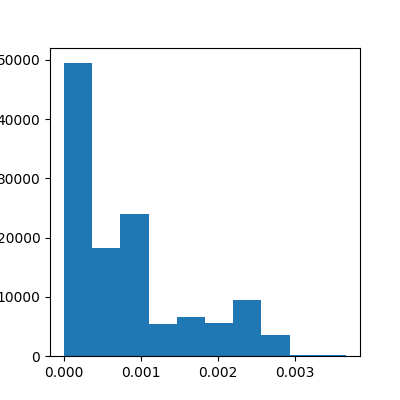

<IPython.core.display.Javascript object>


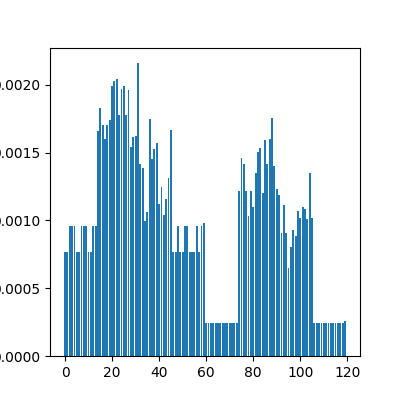

In [91]:
plt.figure(figsize=(4,4))
tlf_demo.axis_data.mlc.plot_mlc_error_hist()
plt.figure(figsize=(4,4))
tlf_demo.axis_data.mlc.plot_rms_by_leaf()

#### save_mlc_error_hist(filename, **kwargs)
Save the MLC error histogram to file.

#### save_rms_by_leaf(filename, **kwargs)
Save the RMS-leaf to file.


### MU 

MU data in MU.

Atributos (Clase Axis):
'actual',
 'expected', 'difference',
 'plot_actual',
 'save_plot_actual',
 'plot_expected',
 'save_plot_expected',
 'plot_difference',
 'save_plot_difference'

In [92]:
tlf_demo.axis_data.mu.__dict__

{'actual': array([0.00000000e+00, 3.37326601e-05, 4.25775070e-05, ...,
        1.83009308e+02, 1.83009308e+02, 1.83009308e+02]),
 'expected': array([  0.,   0.,   0., ..., 183., 183., 183.])}

<IPython.core.display.Javascript object>


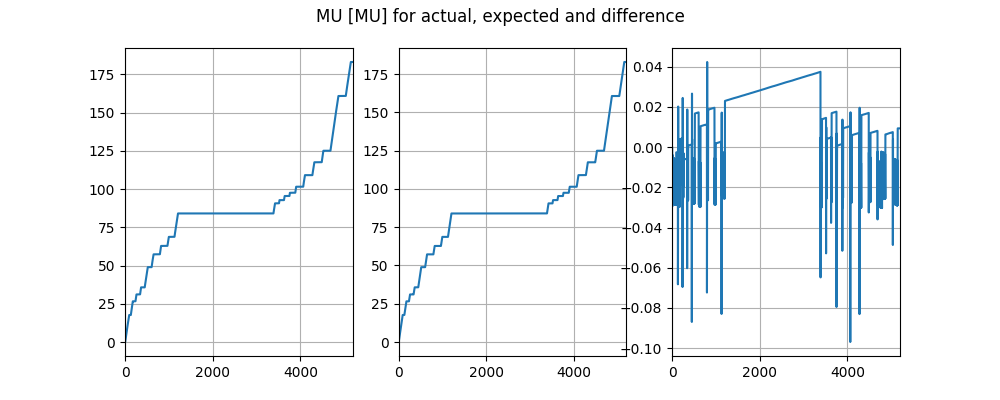

In [93]:
plt.figure(figsize=(10,4))
plt.suptitle("MU [MU] for actual, expected and difference")
plt.subplot(1,3,1)
tlf_demo.axis_data.mu.plot_actual()
plt.subplot(1,3,2)
tlf_demo.axis_data.mu.plot_expected()
plt.subplot(1,3,3)
tlf_demo.axis_data.mu.plot_difference()

### Subbeams

Data structure for trajectory log “subbeams”. Only applicable for auto-sequenced beams.

A subbeam is created when a series of treatment fields are made automatic. Each previously independent field is now handled as a subbeam.
Each subbeam is 560 bytes long and has the following structure:

In [94]:
type(tlf_demo.subbeams.subbeams) # Es de tipo lista: contiene cada campo de tratamiento (tiene 2 el tlf_demo)

list

In [95]:
#Control Point. Internally-defined marker that defines where the plan is currently executing.
tlf_demo.subbeams.subbeams[0].control_point, tlf_demo.subbeams.subbeams[1].control_point

(0, 17)

In [96]:
# Dose delivered in units of MU.
tlf_demo.subbeams.subbeams[0].mu_delivered, tlf_demo.subbeams.subbeams[1].mu_delivered

(84.0, 99.0)

In [97]:
# In units of seconds. Expected (calculated) irradiation time of the subbeam. 
# When the actual irradiation time exceeds the expected radiation time, the system terminates the plan. 
# If the expected irradiation time is zero, then the system does not terminate the plan due to actual irradiation time.
tlf_demo.subbeams.subbeams[0].rad_time, tlf_demo.subbeams.subbeams[1].rad_time

(120.0, 120.0)

In [98]:
# Sequence number of the subbeam.
tlf_demo.subbeams.subbeams[0].sequence_num, tlf_demo.subbeams.subbeams[1].sequence_num

(0, 1)

In [99]:
# Name of the subbeam.
tlf_demo.subbeams.subbeams[0].beam_name, tlf_demo.subbeams.subbeams[1].beam_name

('A:TX', 'B:TX')

In [100]:
# Median collimator angle of the subbeam (unique value)
tlf_demo.subbeams.subbeams[0].collimator_angle.expected # Tiene atributos Axis

180.0

In [101]:
# Median gantry angle of the subbeam.
tlf_demo.subbeams.subbeams[0].gantry_angle.expected # Tiene atributos Axis

310.0

#### Fluence

Structure for data and methods having to do with fluences.    Attributes:

actual : :class:`~pylinac.log_analyzer.FluenceBase`
The actual fluence delivered.

expected : :class:`~pylinac.log_analyzer.FluenceBase`
The expected, or planned, fluence.

gamma : :class:`~pylinac.log_analyzer.GammaFluence`
The gamma structure regarding the actual and expected fluences.\n    

classpylinac.log_analyzer.FluenceBase(mlc_struct=None, mu_axis=None, jaw_struct=None)[source]
Bases: object

An abstract base class to be used for the actual and expected fluences.

*array*

An array representing the fluence map; will be num_mlc_pairs-x-400/resolution. E.g., assuming a Millennium 120 MLC model and a fluence resolution of 0.1mm, the resulting matrix will be 60-x-4000.

Type:	numpy.ndarray

*resolution*

The resolution of the fluence calculation; -1 means calculation has not been done yet.

Type:	int, float

Parameters:	
mlc_struct (MLC_Struct) –
mu_axis (BeamAxis) –
jaw_struct (Jaw_Struct) –

*is_map_calced(raise_error=False)[source]*

Return a boolean specifying whether the fluence has been calculated.

*calc_map[source]*

Calculate a fluence pixel map.

Fluence calculation is done by adding fluence snapshot by snapshot, and leaf pair by leaf pair. Each leaf pair is analyzed separately. First, to optimize, it checks if the leaf is under the y-jaw. If so, the fluence is left at zero; if not, the leaf (or jaw) ends are determined and the MU fraction of that snapshot is added to the total fluence. All snapshots are iterated over for each leaf pair until the total fluence matrix is built.

Parameters:	resolution (int, float) –
The resolution in mm of the fluence calculation in the leaf-moving direction.

returns:	**A numpy array reconstructing the actual fluence of the log. The size will be the number of MLC pairs by 400 / resolution since the MLCs can move anywhere within the 40cm-wide linac head opening.**
rtype:	numpy.ndarray

*plot_map(show=True)[source]*

Plot the fluence; the fluence (pixel map) must have been calculated first.

*save_map(filename, **kwargs)[source]*

Save the fluence map figure to a file.

In [102]:
# Use .calc_map() with desired parameters first.
tlf_demo.subbeams.subbeams[0].fluence.actual.calc_map().shape

(60, 4000)

In [103]:
# Median X1 position of the subbeam.
tlf_demo.subbeams.subbeams[0].jaw_x1.actual # Tienen atributos Axis

3.700000286102295

In [104]:
# Median X2 position of the subbeam.
tlf_demo.subbeams.subbeams[0].jaw_x2.actual

3.3999998569488525

In [105]:
# Median Y1 position of the subbeam.
tlf_demo.subbeams.subbeams[0].jaw_y1.actual

3.799999475479126

In [106]:
# Median Y2 position of the subbeam.
tlf_demo.subbeams.subbeams[0].jaw_y2.actual

3.8999993801116943

#### post_hoc_metadata(axis_data)
From the Axis Data, perform post-hoc analysis and set metadata to the subbeams. Gives the subbeams more information, as not much is given directly in the logs.

In [107]:
#tlf_demo.subbeams.post_hoc_metadata

## Fluence
Fluences created by the MLCs can also be accessed and viewed. Fluences are accessible under the fluence attribute. There are three subclasses that handle the fluences: The fluence actually delivered is in ```ActualFluence```, the fluence planned is in ```ExpectedFluence```, and the gamma of the fluences is in ```GammaFluence```. **Each fluence must be calculated**, however pylinac makes reasonable defaults and has a few shortcuts. The actual and expected fluences can be calculated to any resolution in the leaf-moving direction.

Nota:

Entender bien este algoritmo de cálculo de fluencia (ve la documentación de calc_map()) está bien largo el código :S

### Fluences .actual and expected 
The actual and expected fluences objects

Attributes:
'array', 'resolution', 'FLUENCE_TYPE', 'is_map_calced',
 'calc_map',
 'plot_map',
 'save_map'

#### calc_map
Calculate a fluence pixel map.

Fluence calculation is done by adding fluence snapshot by snapshot, and leaf pair by leaf pair. Each leaf pair is analyzed separately. First, to optimize, it checks if the leaf is under the y-jaw. If so, the fluence is left at zero; if not, the leaf (or jaw) ends are determined and the MU fraction of that snapshot is added to the total fluence. All snapshots are iterated over for each leaf pair until the total fluence matrix is built.

Parameters:	

resolution (int, float) – The resolution in mm of the fluence calculation in the leaf-moving direction.

equal_aspect (bool) – If True, make the y-direction the same resolution as x. If False, the y-axis will be equal to the number of leaves.

returns:

A numpy array reconstructing the actual fluence of the log. The size will be the number of MLC pairs by 400 / resolution since the MLCs can move anywhere within the 40cm-wide linac head opening.

rtype:	numpy.ndarray

In [108]:
# primero se calculan los mapas de fluencia
tlf_demo.fluence.actual.calc_map(resolution=0.1, equal_aspect=False);

In [109]:
tlf_demo.fluence.expected.calc_map(resolution=0.1, equal_aspect=False);

<IPython.core.display.Javascript object>


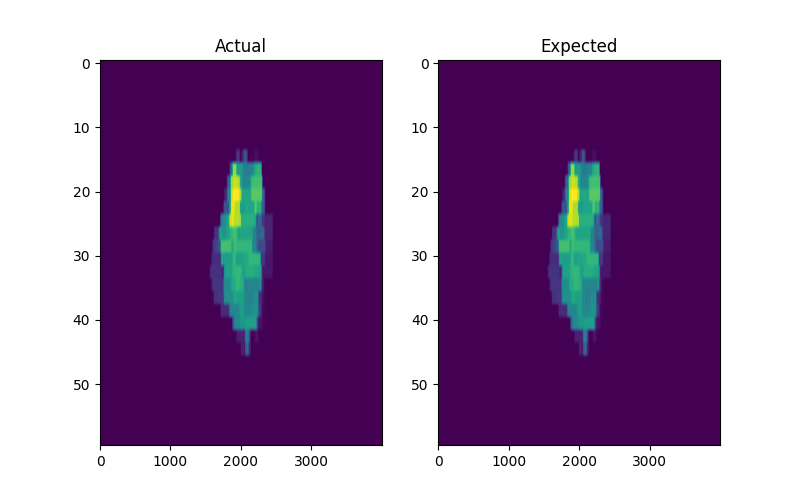

In [110]:
# hay problemas a la hora de graficar en grupos con las funciones integradas de graficación de pylinac
# Para sortear el problema, grafico el array resultante con imshow() (TODO: mejorar la apariencia)
plt.figure(figsize=(8,5))
plt.subplot(121)
plt.title("Actual")
plt.imshow(tlf_demo.fluence.actual.array, aspect='auto')
#tlf_demo.fluence.actual.plot_map()
plt.subplot(122)
plt.title("Expected")
plt.imshow(tlf_demo.fluence.expected.array, aspect='auto');

###  gamma

In [111]:
print(
'Gamma object, including pixel maps of gamma, binary pass/fail pixel map, and others.\n\n    Attributes\n    ----------\n    array : numpy.ndarray\n        The gamma map. Only available after calling calc_map()\n    passfail_array : numpy.ndarray\n        The gamma pass/fail map; pixels that pass (<1.0) are set to 0, while failing pixels (>=1.0) are set to 1.\n    distTA : int, float\n        The distance to agreement value used in gamma calculation.\n    doseTA : int, float\n        The dose to agreement value used in gamma calculation.\n    threshold : int, float\n        The threshold percent dose value, below which gamma was not evaluated.\n    pass_prcnt : float\n        The percent of pixels passing gamma (<1.0).\n    avg_gamma : float\n        The average gamma value.\n    '
)

Gamma object, including pixel maps of gamma, binary pass/fail pixel map, and others.

    Attributes
    ----------
    array : numpy.ndarray
        The gamma map. Only available after calling calc_map()
    passfail_array : numpy.ndarray
        The gamma pass/fail map; pixels that pass (<1.0) are set to 0, while failing pixels (>=1.0) are set to 1.
    distTA : int, float
        The distance to agreement value used in gamma calculation.
    doseTA : int, float
        The dose to agreement value used in gamma calculation.
    threshold : int, float
        The threshold percent dose value, below which gamma was not evaluated.
    pass_prcnt : float
        The percent of pixels passing gamma (<1.0).
    avg_gamma : float
        The average gamma value.
    


#### calc_map
Calculate the gamma from the actual and expected fluences.

The gamma calculation is based on Bakai et al eq.6, which is a quicker alternative to the standard Low gamma equation.

Parameters:	

DoseTA (int, float) – Dose-to-agreement in percent; e.g. 2 is 2%.

DistTA (int, float) – Distance-to-agreement in mm.

threshold (int, float) – The dose threshold percentage of the maximum dose, below which is not analyzed.

resolution (int, float) – The resolution in mm of the resulting gamma map in the leaf-movement direction.

calc_individual_maps (bool) – Not yet implemented. If True, separate pixel maps for the distance-to-agreement and dose-to-agreement are created.

Returns:	

A num_mlc_leaves-x-400/resolution numpy array.

Return type:	

numpy.ndarray

In [112]:
# primero se calcula el mapa gamma:
tlf_demo.fluence.gamma.calc_map(doseTA=0.01, distTA=0.01, threshold=0.1,
                                resolution=0.1, calc_individual_maps=False);

<IPython.core.display.Javascript object>


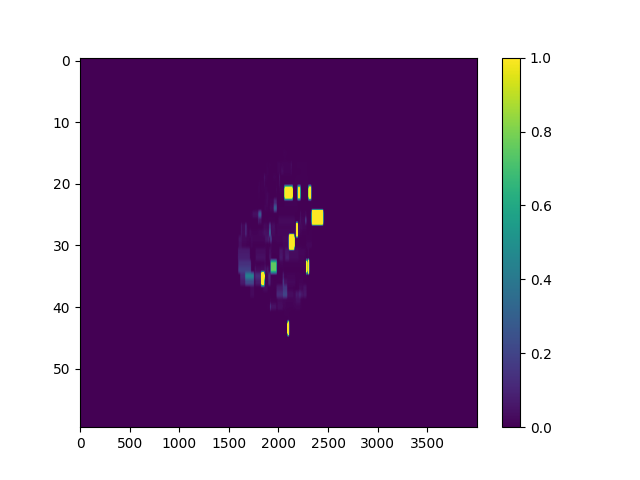

In [113]:
# Graficando con el método integrado: (para hacer la barra es con plt.colorbar() y normal con imshow())
plt.figure()
tlf_demo.fluence.gamma.plot_map()

<IPython.core.display.Javascript object>


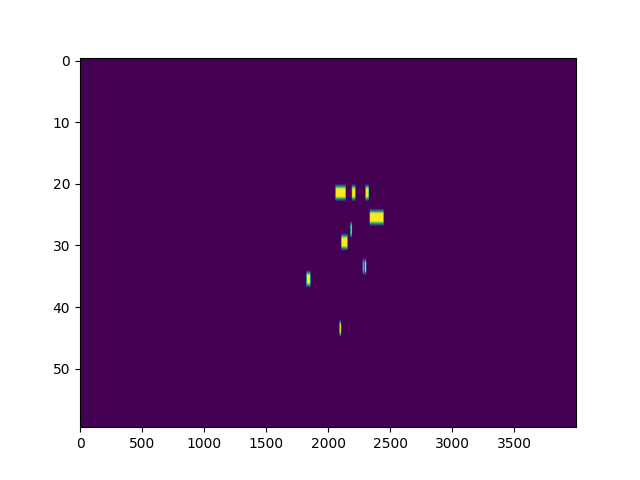

In [114]:
# The gamma pass/fail map; pixels that pass (<1.0) are set to 0, while failing pixels (>=1.0) are set to 1.
plt.figure()
#tlf_demo.fluence.gamma.passfail_array # the array
#tlf_demo.fluence.gamma.plot_passfail_map()
plt.imshow(tlf_demo.fluence.gamma.passfail_array, aspect="auto")

<IPython.core.display.Javascript object>


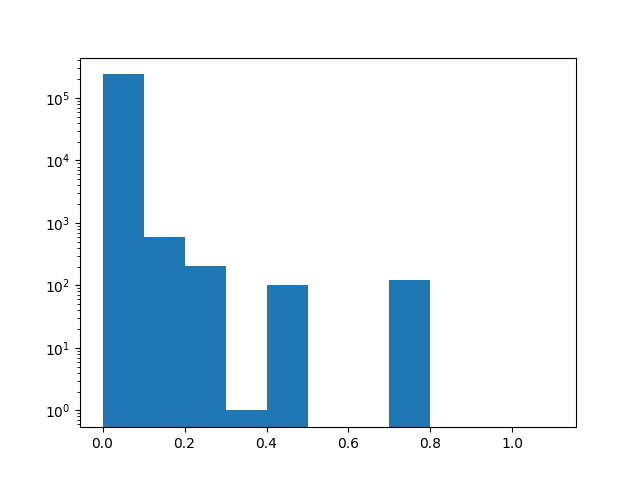

In [115]:
# Return a histogram array and bin edge array of the gamma map values.
#Plot a histogram of the gamma map values.
plt.figure()
#tlf_demo.fluence.gamma.histogram() # TODO: ver dimensión del array (tiene que ver con .flatten())
tlf_demo.fluence.gamma.plot_histogram()

In [116]:
# The average gamma value.
tlf_demo.fluence.gamma.avg_gamma

0.17017358060104049

In [117]:
tlf_demo.fluence.gamma.bins # bins con los que se hizo el histograma (es mejor no tomarlos en cuenta y hacer los propios)

[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 1.1]

In [118]:
# The distance to agreement value used in gamma calculation.
tlf_demo.fluence.gamma.distTA

0.01

In [119]:
# The dose to agreement value used in gamma calculation.
tlf_demo.fluence.gamma.doseTA

0.01

In [120]:
# The threshold percent dose value, below which gamma was not evaluated.
tlf_demo.fluence.gamma.threshold

0.1

In [121]:
# The percent of pixels passing gamma (<1.0).
tlf_demo.fluence.gamma.pass_prcnt

95.00133297787256

In [122]:
tlf_demo.fluence.gamma.resolution

0.1